<a href="https://colab.research.google.com/github/rihabhamrouni/Machine-Learning/blob/main/RandomForest%2BSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler   # <--- ADDED
from sklearn.svm import SVC

iris = datasets.load_iris()
X = iris.data  #features: mesures des fleurs
y = iris.target  #labels: types de fleurs (0,1,2)

In [3]:
#separation des donnees
from sklearn.model_selection import train_test_split

#separation en 70% entrainement 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
#analyse des donnees
print("Valeurs min et max par variable:")
for i, feature_name in enumerate(iris.feature_names):
    min_val = X[:, i].min()
    max_val = X[:, i].max()
    print(f"{feature_name}: min={min_val:.2f}, max={max_val:.2f}")

#les variables ont des echelles differentes
#impact sur SVM: les variables avec de plus grandes valeurs
#dominent le calcul des distances

Valeurs min et max par variable:
sepal length (cm): min=4.30, max=7.90
sepal width (cm): min=2.00, max=4.40
petal length (cm): min=1.00, max=6.90
petal width (cm): min=0.10, max=2.50


In [7]:
#matrice de confusion
# Exemple : prédiction avant la matrice de confusion
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Matrice de confusion:")
print(conf_matrix)


#matrice de confusion: tableau montrant les vrais vs predits labels
#diagonale = bonnes predictions autres cases = erreurs

Matrice de confusion:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [8]:
#rapport de classification
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Rapport de classification:")
print(class_report)

# rapport de classification: metriques detaillees par classe
# precision: quand le modele predit une classe combien de fois a-t-il raison
# recall: parmi les vraies instances dune classe, combien sont correctement predites
# F1-score: moyenne harmonique entre precision et recall

Rapport de classification:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [14]:
#preparation visualisation 2D
#selection de 2 features pour la visualisation
X_2d = X[:, :2]  #sepal length et sepal width seulement
y_2d = y

X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y_2d, test_size=0.3, random_state=42)

scaler_2d = StandardScaler()
X_train_2d_scaled = scaler_2d.fit_transform(X_train_2d)
X_test_2d_scaled  = scaler_2d.transform(X_test_2d)

#nouveau modele avec seulement 2 features
svm_2d = SVC(kernel='linear', random_state=42)
svm_2d.fit(X_train_2d_scaled, y_train_2d)

plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

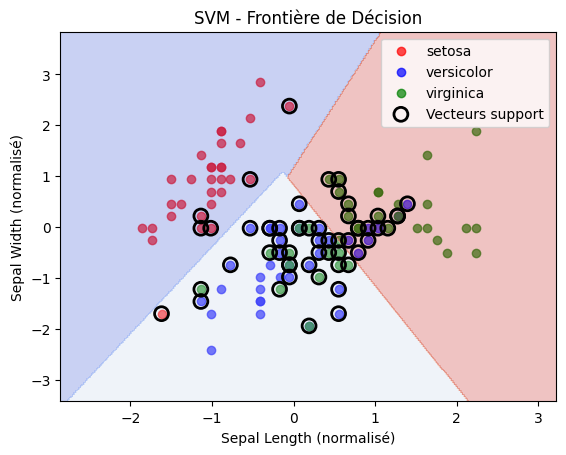

In [15]:
# affichage des points d'entraînement
colors = ['red', 'blue', 'green']
for i, class_name in enumerate(iris.target_names):
    plt.scatter(X_train_2d_scaled[y_train_2d == i, 0],
                X_train_2d_scaled[y_train_2d == i, 1],
                c=colors[i], label=class_name, alpha=0.7)

# creation de la grille pour la frontiere de decision
x_min, x_max = X_train_2d_scaled[:, 0].min() - 1, X_train_2d_scaled[:, 0].max() + 1
y_min, y_max = X_train_2d_scaled[:, 1].min() - 1, X_train_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# affichage de la frontiere de decision
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# affichage des vecteurs de support
support_vectors = svm_2d.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
            s=100, facecolors='none', edgecolors='black',
            linewidths=2, label='Vecteurs support')

plt.xlabel('Sepal Length (normalisé)')
plt.ylabel('Sepal Width (normalisé)')
plt.title('SVM - Frontière de Décision')
plt.legend()
plt.show()

# vecteurs de support: points de données les plus proches de la frontière
# ils définissent la marge et la position de la frontière de décision